In [ ]:
# @title

%%html
<!-- @title -->

<style>
.logos {
  display: flex;
  justify-content: center;
  align-items: center;
  margin-top: 40 px;

  padding: 20 px;
  border-radius: 10 px;
}

.logos img {
  max-height: var(--max-height, 100 px);
  margin: 0 20 px;
}
</style>





<style>
@import url('https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500&family=Montserrat:wght@300;400;600&display=swap');

.main {
  max-width: 1200 px;
  margin: 0 auto;
  background-color: #1c3a6f;
}

.card {
  /* background-color: #2d2d2d; */
  background-color: #1c3a6f;
  /* border-radius: 0.25 rem; */
  border-radius: 0
  display: flex;
  flex-direction: column;
  overflow: hidden;
  padding: 30 px;
  background-repeat: no-repeat;
  line-height: 1.5 rem;
  /* box-shadow: 0 4 px 8 px rgba(255,255,255,0.1); */
  margin-bottom: 30 px;
  color: #D3D3D3;
}


.card_content {
  padding: 1.2 rem;
  color: #D3D3D3;
}
.card_text {
  color: #D3D3D3;
  align-items: center;
  text-align: center;
}
p {
  margin: 1.2 rem 0;
  color: #D3D3D3;
  font-family: 'Roboto', sans-serif;
  font-weight: 300;
  font-size: 18 px;
}

body {
  font-family: 'Roboto', sans-serif;
  /* background-color: #1e1e1e; */
  /* background-color: #1c3a6f; */
  color: #e0e0e0;
}

html {
  font-size: 15 px;
}

h1 {
  font-family: 'Montserrat', sans-serif;
  /* color: #87CEEB; */
  /* color: #213765; */
   color: #ffffff;
}

h2 {
  font-family: 'Montserrat', sans-serif;
  /* color: #87CEEB; */
  /* color: #213765; */
   color: #fab411;
}


h1 {
  position: relative;
  padding: 0;
  margin: 100 px 0 10 px 0;
  font-weight: 600;
  font-size: 40 px;
  font-style: bold;
  -webkit-transition: all 0.4 s ease 0 s;
  -o-transition: all 0.4 s ease 0 s;
  transition: all 0.4 s ease 0 s;
}

h1 span {
  display: block;
  font-size: 0.5 em;
  line-height: 1.3;
  color: #fab411;
}

h1 em {
  font-style: normal;
  font-weight: 600;
  /* color: #1c3a6f; */
  color: #fab411;
}

.head h1 {
  text-align: center;
  font-size: 50 px;
  text-transform: uppercase;
  letter-spacing: 1 px;
  font-weight: 600;
}

.head h1 span {
  margin-top: 5 px;
  font-size: 15 px;
  /* color: #9b9b9b; */
  color: #ffffff;
  word-spacing: 1 px;
  font-weight: normal;
  letter-spacing: 2 px;
  text-transform: uppercase;
  font-family: 'Roboto', sans-serif;
  font-weight: 500;
  display: grid;
  grid-template-columns: 1 fr max-content 1 fr;
  grid-template-rows: 27 px 0;
  grid-gap: 20 px;
  align-items: center;
}

.head h1 span:after, .head h1 span:before {
  content: " ";
  display: block;
  border-bottom: 1 px solid #fab411;
  border-top: 1 px solid #fab411;
  height: 5 px;
  /* background-color: #2d2d2d; */
  background-color: #1c3a6f;
  color: #db9233;
}

.authors {
  text-align: center;
  margin-top: 30 px;
}

.authors h2 {
  font-size: 24 px;
  margin-bottom: 15 px;
}

.authors ul {
  list-style-type: none;
  padding: 0;
}

.authors li {
  margin-bottom: 10 px;
}

.authors a {
  color: #ffffff;
  text-decoration: none;
  transition: color 0.3 s ease;
}

.authors a:hover {
  /* color: #87CEEB; */
  color: #ffffff;
  text-decoration: underline;
}


</style>

<div class="main">
  <div class="head">
    <h1><br /> Machine Learning Prague 2025 <br /> Workshop <br /> <br /> <br />
       <em>3D reconstruction from Images and their application </em>
        <span>6D camera pose</span>
    </h1>
  </div>
  <div class="card">
    <div class="card_content">
      <div class="card_text">
        <p>
          The goal of this notebook is to determine 6D pose of the camera with respect to a board. The board is a custom pattern made with a AprilTags. These tags are at know positions and orientations, and therefore we can use them to determine cameras 6D pose (i.e. location and orientation in space).
        </p>
      </div>
    </div>
  </div>
  <div class="authors">
    <h2>Authors</h2>
    <ul>
      <li>
      <a href="https://usermap.cvut.cz/profile/d883228e-4130-4354-9735-28ff46a786b9">Vít Zeman</a>&emsp;
      <a href="https://usermap.cvut.cz/profile/2d659440-dbf0-435d-af9f-98ed71c158fa">Varun Burde</a>&emsp;
      <a href="https://usermap.cvut.cz/profile/e9f39fe8-0aed-491b-8b2e-f69a65a0cd0e">Artem Moroz</a>&emsp;
      <br />
      </li>
    <br />
    <br />
    </ul>
  </div>
</div>




|![BoardPoses](https://github.com/vitzeman/manim_vis/blob/main/visualization/MSV-Workshop/Board_view.png?raw=true) |
| :---: |
| **Figure 1**: Example of the camera 6D poses visualization|

# Preparation

As always we need to import some libraries and set up the environment.

In [ ]:
import json
import os
from pathlib import Path
import random
import math
# NOTE: Open3D visualization is not straightforward in Google Colab
# !pip install open3d
# import open3d as o3d

import numpy as np
import plotly.graph_objects as go
import cv2
import matplotlib.pyplot as plt


from tqdm import tqdm

## Visualization functions
Helper functions to visualize the results.

In [ ]:
# @title
# >>> Function for visualization of 2D images using matplotlib/opencv >>>
def cv2_imshow(bgr: np.ndarray) -> None:
    """Displays the image in jupyter notebook

    Converts the image from BGR to RGB format as cv2 uses BGR formatand matplotlib
    uses RGB format.


    Args:
        bgr (np.ndarray): Image in BGR format [H, W, C]
    """
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.show()
    return


def visualize_tag_detection(
    image: np.ndarray,
    corners: list,
    ids: list = None,
    color: tuple = (0, 255, 0),
    width: int = 2,
) -> np.ndarray:
    """Visualize the detection of markers by outliying them in the image also indicating
    the first corner with a circle and the id of the marker.

    Returns a copt of the image so that the original image is not modified.

    Args:
        image (np.ndarray): Image in BGR format [H, W, C]
        corners (list): list of the detected corners of the markers in the image
        ids (list, optional): Ids of corresponding marker corners. Defaults to None.
        color (tuple, optional): Color of the outline. Defaults to Green.
        width (int, optional): Width of the outline. Defaults to 2.

    Returns:
        np.ndarray: Image with the detected markers outlined
    """
    out = image.copy()
    for e, corner in enumerate(corners):
        corner = np.int32(corner)
        # Tag circumference highlight
        cv2.polylines(out, corner, True, color, width)
        # Indicate the first corner by inputting a circle
        cv2.circle(out, (corner[0][0][0], corner[0][0][1]), 2 * width + 1, color, -1)
        if ids is not None:
            idx = ids[e]
            cv2.putText(
                out,
                str(idx[0]),
                (corner[0][0][0], corner[0][0][1]),
                cv2.FONT_HERSHEY_SIMPLEX,
                width / 4,
                color,
                width,
            )

    return out


# <<< Function for visualization of 2D images using matplotlib/opencv <<<


# >>> Function for 3D visualization using open3d >>>
# INFO: These will not straightforwardly work in jupyter notebook/google colab due to the
#       open3d visualizer not being able to be embedded in the notebook
# def create_board_mesh(
#     img_path: str, board_size: np.ndarray, name: str = "board"
# ) -> dict:
#     """Prepare the board mesh open3d mesh with the visualization including the image

#     Args:
#         img_path (str): Path to the image of the board to show the mesh
#         board_size (np.ndarray): Real world size of the board in milimeters

#     Returns:
#         dict: Dictionary with the name(str), geometry (o3d.geometry.TriangleMesh) and material (o3d.visualization.rendering.MaterialRecord)
#     """
#     board_image_path = img_path
#     board_bgr = cv2.imread(board_image_path)
#     board_rgb = cv2.cvtColor(board_bgr, cv2.COLOR_BGR2RGB)
#     board_rgb = cv2.flip(board_rgb, 0)
#     map_image = o3d.geometry.Image(board_rgb)

#     # board_size = np.array(board_data["paper_size_mm"])
#     half_size = board_size / 2
#     left_top = np.array([-half_size[0], -half_size[1], 0])
#     right_top = np.array([-half_size[0], half_size[1], 0])
#     right_bot = np.array([half_size[0], half_size[1], 0])
#     left_bot = np.array([half_size[0], -half_size[1], 0])

#     vertices = np.array([left_top, right_top, right_bot, left_bot], dtype=np.float32)
#     triangles = np.array([[0, 1, 2], [0, 2, 3]], dtype=np.int32)
#     uvs = np.array([[0, 0], [1, 0], [1, 1], [0, 0], [1, 1], [0, 1]], dtype=np.float32)

#     # Map the image to the camera pyramid
#     texture_map = o3d.geometry.TriangleMesh()
#     texture_map.vertices = o3d.utility.Vector3dVector(vertices)
#     texture_map.triangles = o3d.utility.Vector3iVector(triangles)
#     texture_map.triangle_uvs = o3d.utility.Vector2dVector(uvs)

#     material = o3d.visualization.rendering.MaterialRecord()
#     material.shader = "defaultUnlit"
#     material.base_color = [1.0, 1.0, 1.0, 1.0]  # RGBA
#     material.base_metallic = 0.0
#     material.base_roughness = 1.0
#     material.albedo_img = map_image

#     board_image = {
#         "name": name,
#         "geometry": texture_map,
#         "material": material,
#     }
#     return board_image


# def create_camera_pyramid(
#     bgr: np.ndarray, cam_K: np.ndarray, Tmx: np.ndarray, name: str = "camera"
# ) -> None:
#     """Based on the camera intrinsics and rgb image creates the camera pyramid

#     Adds visualization of the camera pyramid to the scene with the notch
#     depicting the top of the image

#     Args:
#         bgr (np.ndarray): BGR image [HxWx3]
#         cam_K (np.ndarray): Camera intrinsics [3x3] matrix
#     """
#     h, w = bgr.shape[:2]
#     camera_lineset = o3d.geometry.LineSet()
#     camera_lineset = camera_lineset.create_camera_visualization(
#         w, h, cam_K, Tmx, scale=20
#     )
#     camera_lineset.paint_uniform_color([0.2, 0.2, 0.2])
#     camera_points = np.asarray(camera_lineset.points)

#     # create top view of the pyramid
#     left_top = camera_points[1, :]
#     right_top = camera_points[2, :]
#     right_bot = camera_points[3, :]
#     left_bot = camera_points[4, :]
#     height = np.abs(right_bot[1] - right_top[1])
#     h = height * 0.33

#     # Top Notch
#     mid_width = (right_top[0] - left_top[0]) / 2
#     notch_point = np.array([left_top[0] + mid_width, left_top[1] - h, left_top[2]])
#     notch_points = np.array([left_top, right_top, notch_point])
#     top_lineset = o3d.geometry.LineSet()
#     top_lineset.points = o3d.utility.Vector3dVector(notch_points)
#     top_lineset.lines = o3d.utility.Vector2iVector([[0, 2], [2, 1]])
#     top_lineset.paint_uniform_color([0.2, 0.2, 0.2])

#     # Add image to the camera pyramid
#     img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
#     img = cv2.flip(img, 0)
#     map_image = o3d.geometry.Image(img)

#     vertices = np.array([left_top, right_top, right_bot, left_bot], dtype=np.float32)
#     triangles = np.array([[0, 1, 2], [0, 2, 3]], dtype=np.int32)
#     uvs = np.array([[0, 0], [1, 0], [1, 1], [0, 0], [1, 1], [0, 1]], dtype=np.float32)

#     texture_map = o3d.geometry.TriangleMesh()
#     texture_map.vertices = o3d.utility.Vector3dVector(vertices)
#     texture_map.triangles = o3d.utility.Vector3iVector(triangles)
#     texture_map.triangle_uvs = o3d.utility.Vector2dVector(uvs)

#     material = o3d.visualization.rendering.MaterialRecord()
#     material.shader = "defaultUnlit"
#     material.base_color = [1.0, 1.0, 1.0, 1.0]  # RGBA
#     material.base_metallic = 0.0
#     material.base_roughness = 1.0
#     material.albedo_img = map_image

#     camera_img = {
#         "name": name,
#         "geometry": texture_map,
#         "material": material,
#     }
#     return [camera_lineset, top_lineset, camera_img]


# <<< Function for visualization of 3D data using open3d <<<


# >>> Function for 3D visualazation using plotly >>>
def to_homogeneous(points):
    pad = np.ones((points.shape[:-1] + (1,)), dtype=points.dtype)
    return np.concatenate([points, pad], axis=-1)


def init_figure(height: int = 800) -> go.Figure:
    """Initialize a 3D figure."""
    fig = go.Figure()
    axes = dict(
        visible=False,
        showbackground=False,
        showgrid=False,
        showline=False,
        showticklabels=True,
        autorange=True,
    )
    fig.update_layout(
        template="plotly_white",
        #  ['ggplot2', 'seaborn', 'simple_white', 'plotly',
        #  'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
        #  'ygridoff', 'gridon', 'none']
        height=height,
        scene_camera=dict(
            eye=dict(x=0.0, y=-0.1, z=2),
            up=dict(x=0, y=1.0, z=0),
            projection=dict(type="orthographic"),
        ),
        scene=dict(
            xaxis=axes,
            yaxis=axes,
            zaxis=axes,
            aspectmode="data",
            dragmode="orbit",
        ),
        margin=dict(l=0, r=0, b=0, t=0, pad=0),
        legend=dict(orientation="h", yanchor="top", y=0.99, xanchor="left", x=0.1),
    )
    return fig


def plot_camera(
    fig: go.Figure,
    R: np.ndarray,  # R_wc, from camera to world, size (3,3)
    t: np.ndarray,  # t_wc, from camera to world, size (3,)
    K: np.ndarray,  # size (3,3)
    color: str = "rgb(50, 50, 50)",
    name: str = None,
    legendgroup: str = None,
    fill: bool = False,
    size: float = 1.0,
    text: str = None,
):
    """Plot a camera frustum from pose and intrinsic matrix."""
    W, H = K[0, 2] * 2, K[1, 2] * 2
    corners = np.array([[0, 0], [W, 0], [W, H], [0, H], [0, 0]])
    if size is not None:
        image_extent = max(size * W / 1024.0, size * H / 1024.0)
        world_extent = max(W, H) / (K[0, 0] + K[1, 1]) / 0.5
        scale = 0.5 * image_extent / world_extent
    else:
        scale = 1.0
    corners = to_homogeneous(corners) @ np.linalg.inv(K).T
    corners = (corners / 2 * scale) @ R.T + t
    legendgroup = legendgroup if legendgroup is not None else name

    x, y, z = np.concatenate(([t], corners)).T
    i = [0, 0, 0, 0]
    j = [1, 2, 3, 4]
    k = [2, 3, 4, 1]

    triangles = np.vstack((i, j, k)).T
    vertices = np.concatenate(([t], corners))

    tri_points = np.array([vertices[i] for i in triangles.reshape(-1)])

    top_left = tri_points[1, :]
    top_right = tri_points[2, :]
    bot_left = tri_points[-2, :]
    top_mid = (top_right - top_left) / 2
    left = top_left - bot_left
    notch = top_left + top_mid + left * 0.5

    notch_triplet = np.array([top_left, notch, top_right])
    tri_points = np.concatenate((tri_points, notch_triplet), axis=0)

    x, y, z = tri_points.T

    pyramid = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode="lines",
        legendgroup=legendgroup,
        name=name,
        line=dict(color=color, width=2),
        showlegend=False,
        hovertemplate=text.replace("\n", "<br>"),
    )
    fig.add_trace(pyramid)


def plot_world_coordinates(fig: go.Figure, size: float = 200.0):
    # Add the x-axis
    fig.add_trace(
        go.Scatter3d(
            x=[0, size],
            y=[0, 0],
            z=[0, 0],
            mode="lines",
            name="x-axis",
            line=dict(color="red", width=4),
        )
    )

    # Add the y-axis
    fig.add_trace(
        go.Scatter3d(
            x=[0, 0],
            y=[0, size],
            z=[0, 0],
            mode="lines",
            name="y-axis",
            line=dict(color="green", width=4),
        )
    )

    # Add the z-axis
    fig.add_trace(
        go.Scatter3d(
            x=[0, 0],
            y=[0, 0],
            z=[0, size],
            mode="lines",
            name="z-axis",
            line=dict(color="blue", width=4),
        )
    )


# <<< Function for visualazation using plotly <<<

## Preparing the images

The images used for reconstructing the scene are captured followimg rules:
  * At least one of the AprilTags is visible in each image.
  * Limit the bluriness by:
    1. board being in focus range of the camera.
    2. the camera is either static during the image taking.
    3. or image is taken with smallest exposure time possible.
  * Capturing "spherical" scan of the scene
  * Keeping  the lighting condition constant
  

In [ ]:
!git clone https://github.com/vitzeman/MLPrague25_WorkshopDatasetBoard.git

fatal: destination path 'MLPrague25_WorkshopDatasetBoard' already exists and is not an empty directory.


In [ ]:
directry_with_images = Path("MLPrague25_WorkshopDatasetBoard/data/dataset/rgb")
image_files = list(directry_with_images.glob("*.png"))
image_files.sort()
num_dataset_images = len(image_files)
print(f"Found {num_dataset_images} images in `{directry_with_images}`")
assert num_dataset_images == 149, f"All the images were not loaded expected: 149 got: {num_dataset_images}"

Found 149 images in `MLPrague25_WorkshopDatasetBoard/data/dataset/rgb`


The dataset consist of 149 images. All of them can be seen in the following GIF.

|![Dataset collection](https://github.com/vitzeman/manim_vis/blob/main/visualization/MSV-Workshop/Dataset_scaled.gif?raw=true) |
| :---: |
| **Figure 2**: Quick view of all the dataset images |




## Perspective-n-Point (PnP) pose computation
To determine the camera 6D pose, we will use the Perspectiv-n-Point (PnP) algorithm, as we know tags position in world thanks to the custom-made board.

|![BoardPoses](https://docs.opencv.org/4.10.0/pnp.jpg) |
| :---: |
| **Figure 3**: Camera pose in world |
|**Source:** [Perspective-n-Point (PnP) pose computation](https://docs.opencv.org/4.10.0/d5/d1f/calib3d_solvePnP.html)|






The correspondencies between the image and world space are used to determine the camera pose by solving the Perspective-n-Point (PnP) problem, by minimizing the reprojection error.
To solve this we also need to know the camera behavior, described by the intrinsic parameters and distortion coefficients.
In case of this dataset we used already calibrated camera [Intel Realsens D456](https://www.intelrealsense.com/depth-camera-d456/) to capture the color images.



We will show the example and required steps to compute the camera poses on one image.

We first load the path to the data and showcase the process on the first image .

Example image files: MLPrague25_WorkshopDatasetBoard/data/dataset/rgb/000000.png


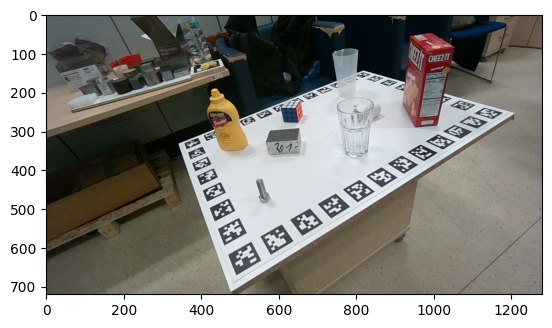

In [ ]:
example_image_path = str(image_files[0])
example_image = cv2.imread(example_image_path)
print(f"Example image files: {example_image_path}")
cv2_imshow(example_image)

## Image points

|  |  |
|:-------------------------:|:-------------------------:|
| <img width="1010" alt="OpenCV" src="https://github.com/vitzeman/manim_vis/blob/main/visualization/MSV-Workshop/Board.png?raw=true">|<img width="1010" alt="OpenGL" src="https://github.com/vitzeman/manim_vis/blob/main/visualization/MSV-Workshop/Board_detection.png?raw=true">|
| **Figure 4**: Board design | **Figure 5**: Tag Detection |

This custom made board was made with [AprilTags](https://april.eecs.umich.edu/software/apriltag), more specifically with the AprilTag 36h11. The tags are placed at predefined positions. These Tags are designed to be easily and accurately detected.
In this workshop we will use [OpenCV's implementation](https://docs.opencv.org/4.x/d5/dae/tutorial_aruco_detection.html) to detect these Tags.

In [ ]:
# Inicialization of the tags
params = cv2.aruco.DetectorParameters()
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36H11)
detector = cv2.aruco.ArucoDetector(aruco_dict, params)

In [ ]:
# The detection is made on the gray image to speed up the process
gray_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2GRAY)

tag_corners, tag_ids, rejected = detector.detectMarkers(gray_image)
num_tags = len(tag_ids)
print(f"Detected {num_tags} tags")


Detected 22 tags


We can visualize the tags in the image with previously defined functions. The top left corner of each tag is highlighted by the dot. Also the tag IDs are shown in the image.

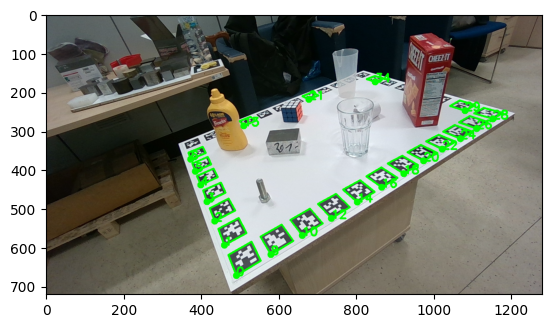

In [ ]:
detected_image = visualize_tag_detection(
    example_image, tag_corners, tag_ids, color=(0, 255, 0), width=4
)
cv2_imshow(detected_image)

We can also visual the rejected regions of interest (red four-sided polygons).

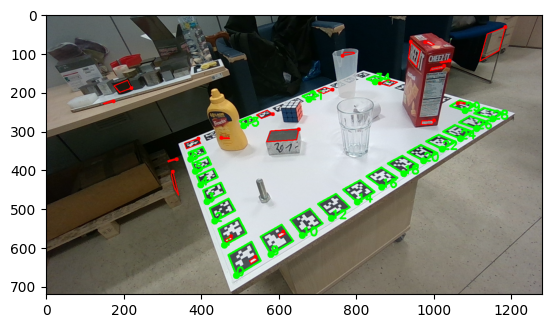

In [ ]:
detected_image = visualize_tag_detection(
    detected_image, rejected, color=(0, 0, 255), width=2
)
cv2_imshow(detected_image)

## World points
Now we query by the tag ids into the dictionary and retrieve their corners world positions.
The board data  dictionary in following format:
```python
board: dict = {
  "tag_size_mm": 50,
  "paper_size_mm": [
    841,
    594,
    0
  ],
  "num_x": 8,
  "num_y": 12,
  "<tag_id>": [
    [top_left_x, top_left_y, top_right_z],
    [top_right_x, top_right_y, top_right_z],
    [bottom_left_x, bottom_left_y, bottom_left_z],
    [bottom_right_x, bottom_right_y, bottom_right_z]
  ],
  "<tag_id>": ...
}
```

In [ ]:
# Load the board data
board_data_path = "MLPrague25_WorkshopDatasetBoard/data/board/board_centered_rotated_mm.json"
with open(board_data_path, "r") as f:
    board_data = json.load(f)

# Convert the corners to a numpy array
corners_image_pts = np.array(tag_corners).reshape(-1, 2)
# Preallocate the array for the world points
corners_world_pts = np.zeros((num_tags * 4, 3), dtype=np.float32)

for e, tag_id in enumerate(tag_ids):
    i = tag_id[0]
    # Query into the board data
    corners_world_pts[e * 4 : (e + 1) * 4, :] = np.array(board_data[str(i)]).reshape(
        -1, 3
    )

## Camera params
As mentioned previously, to reproject the points we need to know the camera parameters.
We usd the camera calibration from the Intel Realsense D456 camera, which is already calibrated and the images are already undistorted, meaning that the distortion coefficients are set to zero.

The camera's intrinsic parameters are stored in the `camera_params` file. We need to load it first.

In [ ]:
path2camera_matrix = (
    "MLPrague25_WorkshopDatasetBoard/data/dataset/cam_intrinsics.json"
)
with open(path2camera_matrix, "r") as f:
    camera_params = json.load(f)

Kmx = np.array(camera_params["K"])
dist_coeffs = np.zeros((5), dtype=np.float32)

## Solving the Perspective-n-Point (PnP)
Knowing the image points and their corresponding world points, with camera parameters we can solve the PnP using [OpenCV's implementaion](https://docs.opencv.org/4.10.0/d5/d1f/calib3d_solvePnP.html).

In [ ]:
ret, rvec, tvec = cv2.solvePnP(
    corners_world_pts,
    corners_image_pts,
    Kmx,
    dist_coeffs,
    flags=cv2.SOLVEPNP_ITERATIVE,
)
if not ret:
    print("Failed to solve PnP")

## 6D Pose
There are multiple ways how to store the 6D pose of arbitrary object. Most common way is to use a 4x4 matrix, which contains the tranlation vector $\mathbf{t}$ and the rotation matrix $\mathbf{R}$. The rotation matrix is a 3x3 matrix, which describes the orientation in space. The translation vector is a 3x1 vector, which contains the position (x,y,z) of the object in space. The 4x4 matrix is constructed as follows:
$$
\mathbf{T} = \begin{bmatrix}
\mathbf{R} & \mathbf{t} \\
\mathbf{0}^\mathrm{T} & 1
\end{bmatrix}
$$

Other common way is to use a rotation vector $\mathbf{r}$, or a quaternion $\mathbf{q}$. The rotation vector is a 3x1 vector, which contains the axis of rotation(unit 3x1 vector) and the angle of rotation(scalar). The quaternion is a 4x1 vector, which contains the axis of rotation and the angle of rotation.

As part of this workshop we will be using a 4x4 matrix as although it is not the most efficient way of storing the pose. It is commonly used in computer vision and can be used directly to transform points from one coordinate system to another.


In [ ]:
Tmx_example = np.eye(4, dtype=np.float32)
Tmx_example[:3, :3] = cv2.Rodrigues(rvec)[0]
Tmx_example[:3, 3] = tvec.flatten()
Tmx_example = np.linalg.inv(Tmx_example)
with np.printoptions(precision=3, suppress=True):
    print("Camera Tmx:")
    print(Tmx_example)

Camera Tmx:
 [[   0.853   -0.412    0.322 -376.684]
 [  -0.498   -0.454    0.738 -572.1  ]
 [  -0.158   -0.79    -0.592  415.941]
 [   0.       0.       0.       1.   ]]


## Visualization estimated
We can visualize the result by:
1. Projecting the origin coordinate frame into the image,


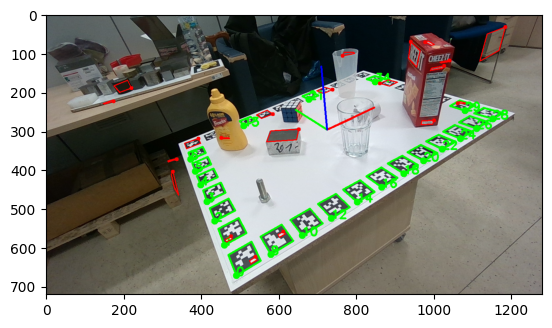

In [ ]:
detected_image = cv2.drawFrameAxes(detected_image, Kmx, dist_coeffs, rvec, tvec, 200)
cv2_imshow(detected_image)

2. or better within a 3D scene

|![BoardPoses](https://github.com/vitzeman/manim_vis/blob/main/visualization/MSV-Workshop/Single_all.gif?raw=true) |
| :---: |
| **Figure 6**: Visualization of the example camera's 6D Pose made with Open3D|

The following code will visualize the camera pose in the world coordinate system in plotly, in interactive mode. The camera is represented by a pyramid, with notch denoting the camera's up direction.


In [ ]:
fig = init_figure()
plot_world_coordinates(fig, size=200.0)


plot_camera(
    fig,
    Tmx_example[:3, :3],
    Tmx_example[:3, 3],
    Kmx,
    name="Exaple image",
    text="Exaple image",
    fill=False,
    size = 200
)

fig.show()

# Estimate all the camera poses

We showed how to estimate the camera 6D pose for a single image. Now we will repeat the process for all the images in the dataset.

In [ ]:
camera_poses = []
for e, image_file in enumerate(tqdm(image_files, desc="Processing", unit="images")):

    bgr = cv2.imread(str(image_file))
    gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

    corners, ids, rejected = detector.detectMarkers(gray)


    num_tags = len(corners)

    if num_tags == 0:
        print(f"No tags detected in image {str(image_file)}")
        continue

    corners_image_pts = np.array(corners).reshape(-1, 2)
    corners_world_pts = np.zeros((num_tags * 4, 3), dtype=np.float32)

    for e, tag_id in enumerate(ids):
        i = tag_id[0]
        # Query into the board data
        corners_world_pts[e * 4 : (e + 1) * 4, :] = np.array(
            board_data[str(i)]
        ).reshape(-1, 3)

        ret, Rvec, tvec = ret, rvec, tvec = cv2.solvePnP(
        corners_world_pts,
        corners_image_pts,
        Kmx,
        dist_coeffs,
        flags=cv2.SOLVEPNP_ITERATIVE,
    )

    if not ret:
        print("Failed to solve PnP")
        continue

    Tmx = np.eye(4, dtype=np.float32)
    Tmx[:3, :3] = cv2.Rodrigues(Rvec)[0]
    Tmx[:3, 3] = tvec.reshape(-1)

    Tmx = np.linalg.inv(Tmx)

    camera_data = {
        "file_path": str(image_file),
        "transform_matrix": Tmx.tolist(),

    }
    camera_poses.append(camera_data)



Processing: 100%|██████████| 149/149 [00:13<00:00, 11.07image/s]


## Visualization of all the camera poses
Simmilarly we will visualize all the camera poses in the world coordinate system. The camera is represented by a pyramid, with notch denoting the camera's up direction.
The expected result visualization is shown in the following GIFs:


|  |  |
|:-------------------------:|:-------------------------:|
| <img width="1010" alt="OpenCV" src="https://github.com/vitzeman/manim_vis/blob/main/visualization/MSV-Workshop/Multi_frame_all_10th.gif?raw=true">|<img width="1010" alt="OpenGL" src="https://github.com/vitzeman/manim_vis/blob/main/visualization/MSV-Workshop/Multi_frame_cross_every.gif?raw=true">|
| **Figure 7**: Visualization of the every 10th camera's 6D pose made with Open3D | **Figure 8**: Visualization of all the retrieved camera's 6D pose (showing only coordinates frames)|


Visualization with interactive window.

In [ ]:
fig = init_figure()
plot_world_coordinates(fig, size=200.0)

for camera in camera_poses:
    Tmx = np.array(camera["transform_matrix"])
    text = camera["file_path"].split("/")[-1].split(".")[0]
    plot_camera(
        fig,
        Tmx[:3, :3],
        Tmx[:3, 3],
        Kmx,
        name=text,
        text=text,
        fill=False,
        size = 200
    )

fig.show()


# Conversion to the iNGP format


## Conversion to transforms.json format

Recap intinsic matrix $\mathbf{K}$:
$$
\mathbf{K} = \begin{bmatrix}
f_x & 0 & c_x \\
0 & f_y & c_y \\
0 & 0 & 1
\end{bmatrix}
$$
Where $f_x$ and $f_y$ are the focal lengths in pixels, and $c_x$ and $c_y$ are the coordinates of the principal point in pixels. The focal length is defined as the distance between the camera lens and the image sensor. The principal point is defined as the point where the optical axis intersects the image plane. The focal length and principal point are used to convert 3D world coordinates to 2D image coordinates.

In [ ]:
fl_x = Kmx[0, 0]
fl_y = Kmx[1, 1]
cx = Kmx[0, 2]
cy = Kmx[1, 2]
height, width, _ = bgr.shape

angle_x = math.atan(width / (fl_x * 2)) * 2
angle_y = math.atan(height / (fl_y * 2)) * 2
k1 = dist_coeffs[0]
k2 = dist_coeffs[1]
p1 = dist_coeffs[2]
p2 = dist_coeffs[3]


The format is a dictionary with entries about the camera intrinsic behaviour as well as the the information about the images saved in `"frames"`. Each entry in the `"frames"` list is a dictionary with two keys `"file_path"` and `"transform_matrix"`. The `"file_path"` key contains the path to the image file, and the `"transform_matrix"` key contains the 4x4 transformation matrix stored in list.

In [ ]:
transforms = {
    "camera_angle_x": angle_x,
    "camera_angle_y": angle_y,
    "fl_x": float(fl_x),
    "fl_y": float(fl_y),
    "k1": float(k1),
    "k2": float(k2),
    "p1": float(p1),
    "p2": float(p2),
    "cx": float(cx),
    "cy": float(cy),
    "w": width,
    "h": height,
    "aabb_scale": 1,
    "scale_factor": 0,
    "frames": [],
}



## Conversion of the camera notation
Up until now we worked with camera notation from OpenCV. However in computer graphics a OpenGL notation is also commonly used. Their difference are shouwn in the following illustration:


|  |  |
|:-------------------------:|:-------------------------:|
| <img width="1604" alt="OpenCV" src="https://github.com/vitzeman/manim_vis/blob/main/visualization/MSV-Workshop/OpenCV.png?raw=true">|<img width="1604" alt="OpenGL" src="https://github.com/vitzeman/manim_vis/blob/main/visualization/MSV-Workshop/OpenGL.png?raw=true">|
| **Figure 9**: OpenCV camera coordinate frame notatiton | **Figure 10**: OpenGL camera coordinate frame notatito |

The x axis stays the same, and the two coordinate frames differ in the y and z axis.
In OpenCV the y axis is pointing down, while in OpenGL it is pointing up.
In OpenGL the z axis is pointing backwards, while in OpenCV it is pointing forwards.



The transformation between these two frames is described as rotation by 180 degrees around the x axis, which can be described as transformation matrix:
$$
\mathbf{T}_{\mathrm{CV2GL}} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$
We can chain this transformation with previously obtained camera pose to obtain the desired camera pose in OpenGL notation.



In [ ]:
Tmx_CV2GL = np.diag((1, -1, -1, 1))
with np.printoptions(precision=1, suppress=True):
    print("Tmx_CV2GL =")
    print(Tmx_CV2GL)

Tmx_CV2GL =
[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  1]]


Furthermore, we scale all the poses to be in unit cube. This is done by divinding the translation vector of each pose by the farhest point in the dataset. This is done for efficiency reasons. However as we know the scale factor of the dataset, we can ground both the generated images and novel viewpoints in real world coordinates.

In [ ]:

cameras_openGL = []
scale_factor = transforms["scale_factor"]
for camera_data in camera_poses:
    Tmx = np.array(camera_data["transform_matrix"])

    # Determining the maximal distance to the board origin
    distance_to_board = np.linalg.norm(Tmx[:3, 3])
    if distance_to_board > scale_factor:
        scale_factor = distance_to_board

    # Flip the orientation of the camera
    Tmx = Tmx @ Tmx_CV2GL
    Tmx = Tmx.tolist()
    path = camera_data["file_path"]

    # convert to relative path
    # TODO: Check in colab
    splitted = path.split("/")[-2:]
    relative_path = "/".join(splitted)

    cameras_openGL.append(
        {
            "file_path": relative_path,
            "transform_matrix": Tmx,
        }
    )

# Save the transforms to a json file
transforms["scale_factor"] = scale_factor

# Now we apply the scale factor to all the transformation matrices
for camera in cameras_openGL:
    camera["transform_matrix"] = np.array(camera["transform_matrix"]) / scale_factor
    camera["transform_matrix"] = camera["transform_matrix"].tolist()
    transforms["frames"].append(camera)


Finaly we save the data into the json file, which can be loaded into another programs/piplines.

In [ ]:

with open("transforms.json", "w") as f:
    json.dump(transforms, f, indent=2)


In [ ]:
# @title
%%html
<!-- @title -->

<style>
.logos {
  display: flex;
  justify-content: center;
  align-items: center;
  margin-top: 40 px;

  padding: 20 px;
  border-radius: 10 px;
}

.logos img {
  max-height: var(--max-height, 100 px);
  margin: 0 20 px;
}
</style>





<style>
@import url('https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500&family=Montserrat:wght@300;400;600&display=swap');

.main {
  max-width: 1200 px;
  margin: 0 auto;
  background-color: #1c3a6f;
}

.card {
  /* background-color: #2d2d2d; */
  background-color: #1c3a6f;
  /* border-radius: 0.25 rem; */
  border-radius: 0
  display: flex;
  flex-direction: column;
  overflow: hidden;
  padding: 30 px;
  background-repeat: no-repeat;
  line-height: 1.5 rem;
  /* box-shadow: 0 4 px 8 px rgba(255,255,255,0.1); */
  margin-bottom: 30 px;
  color: #D3D3D3;
}


.card_content {
  padding: 1.2 rem;
  color: #D3D3D3;
}
.card_text {
  color: #D3D3D3;
  align-items: center;
  text-align: center;
}
p {
  margin: 1.2 rem 0;
  color: #D3D3D3;
  font-family: 'Roboto', sans-serif;
  font-weight: 300;
  font-size: 18 px;
}

body {
  font-family: 'Roboto', sans-serif;
  /* background-color: #1e1e1e; */
  /* background-color: #1c3a6f; */
  color: #e0e0e0;
}

html {
  font-size: 15 px;
}

h1 {
  font-family: 'Montserrat', sans-serif;
  /* color: #87CEEB; */
  /* color: #213765; */
   color: #ffffff;
}

h2 {
  font-family: 'Montserrat', sans-serif;
  /* color: #87CEEB; */
  /* color: #213765; */
   color: #fab411;
}


h1 {
  position: relative;
  padding: 0;
  margin: 100 px 0 10 px 0;
  font-weight: 600;
  font-size: 40 px;
  font-style: bold;
  -webkit-transition: all 0.4 s ease 0 s;
  -o-transition: all 0.4 s ease 0 s;
  transition: all 0.4 s ease 0 s;
}

h1 span {
  display: block;
  font-size: 0.5 em;
  line-height: 1.3;
  color: #fab411;
}

h1 em {
  font-style: normal;
  font-weight: 600;
  /* color: #1c3a6f; */
  color: #fab411;
}

.head h1 {
  text-align: center;
  font-size: 50 px;
  text-transform: uppercase;
  letter-spacing: 1 px;
  font-weight: 600;
}

.head h1 span {
  margin-top: 5 px;
  font-size: 15 px;
  /* color: #9b9b9b; */
  color: #ffffff;
  word-spacing: 1 px;
  font-weight: normal;
  letter-spacing: 2 px;
  text-transform: uppercase;
  font-family: 'Roboto', sans-serif;
  font-weight: 500;
  display: grid;
  grid-template-columns: 1 fr max-content 1 fr;
  grid-template-rows: 27 px 0;
  grid-gap: 20 px;
  align-items: center;
}

.head h1 span:after, .head h1 span:before {
  content: " ";
  display: block;
  border-bottom: 1 px solid #fab411;
  border-top: 1 px solid #fab411;
  height: 5 px;
  /* background-color: #2d2d2d; */
  background-color: #1c3a6f;
  color: #db9233;
}

.authors {
  text-align: center;
  margin-top: 30 px;
}

.authors h2 {
  font-size: 24 px;
  margin-bottom: 15 px;
}

.authors ul {
  list-style-type: none;
  padding: 0;
}

.authors li {
  margin-bottom: 10 px;
}

.authors a {
  color: #ffffff;
  text-decoration: none;
  transition: color 0.3 s ease;
}

.authors a:hover {
  /* color: #87CEEB; */
  color: #ffffff;
  text-decoration: underline;
}


</style>

<div class="main">
  <div class="head">
    <h1><br />  Machine Learning Prague 2025 <br /> Workshop <br /> <br /> <br />
       <em>3D reconstruction from Images and their application </em>
        <span>6D camera pose</span>
    </h1>
  </div>
  <div class="card">
    <div class="card_content">
      <div class="card_text">

      </div>
    </div>
  </div>
  <div class="authors">
    <h2>Thank you for your attention
    </h2>
    <ul>

       <br /> <br /> <br />

    </ul>
  </div>
</div>
